Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1

3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [2]:
# Instala las librerias necesarias
%pip install opencv-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importa las librerias necesarias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [19]:
# Capta la ruta de la notebook
ruta_notebook = os.getcwd()

# Describe la ruta al template
template_path = ruta_notebook + '/template/pattern_0.png'

# Describe la ruta a la carperta de imagenes
images_path = ruta_notebook + '/images/coca_multi.png'

# Describe la ruta a la carperta de imagenes preprocesadas
images_canny_path = ruta_notebook + '/images_canny/canny_coca_multi.png'

# Describe la ruta a la carpeta de imagenes con detecciones por plantilla
images_detect_path = ruta_notebook + '/images_detections/multi_match/detect_coca_multi'

Nuevamente, se utiliza la imagen preprocesada a traves del algoritmo de canny:

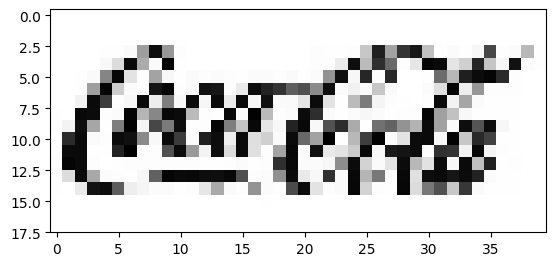

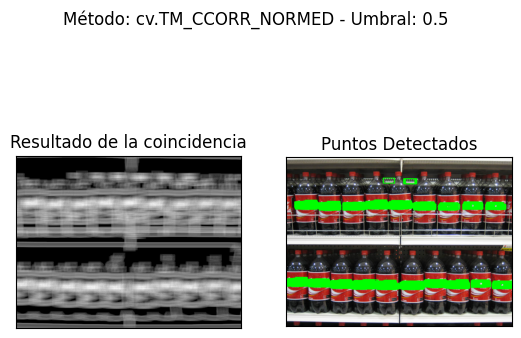

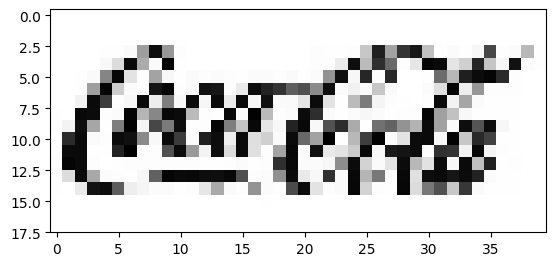

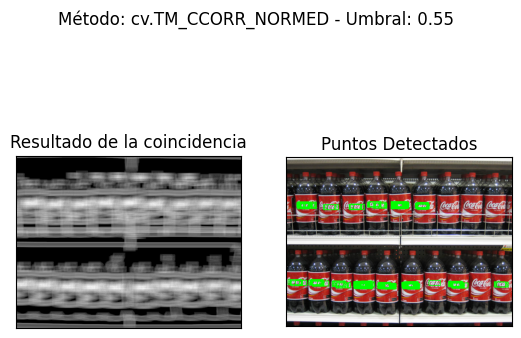

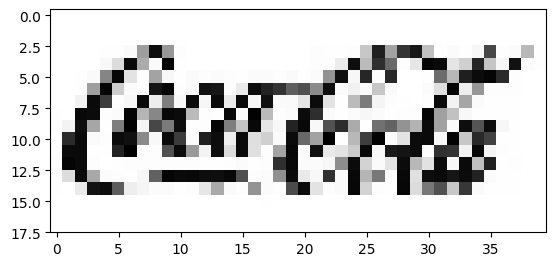

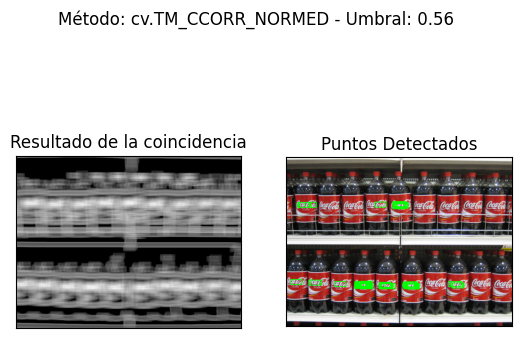

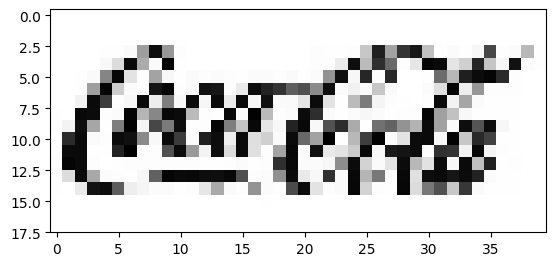

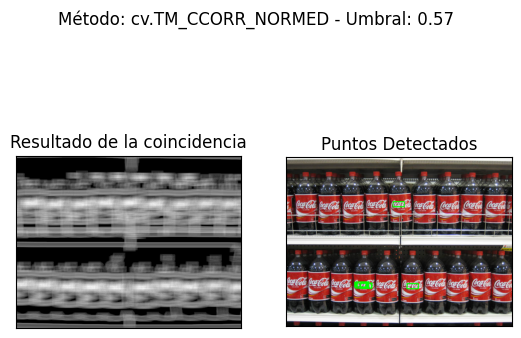

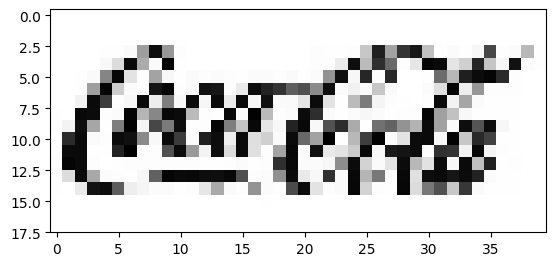

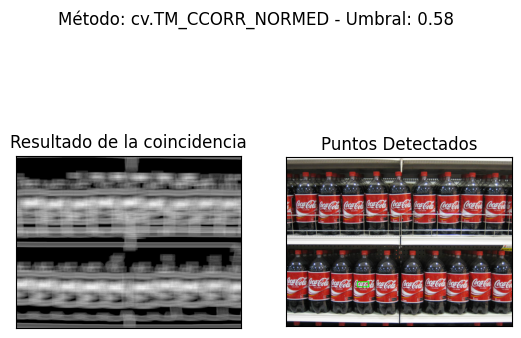

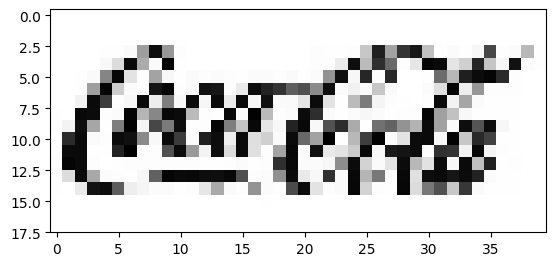

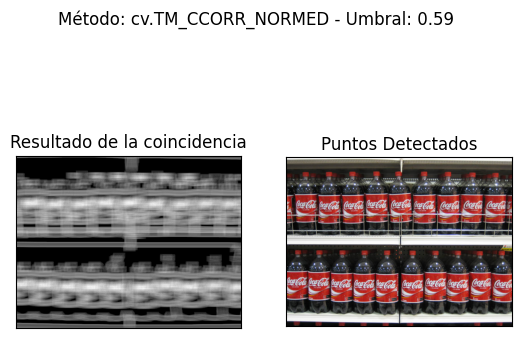

In [24]:
# Define la funcion de deteccion
def deteccion_multi(meth, ruta_imagen_original, ruta_imagen_canny, ruta_template, ruta_guarda, umbral):
    """
    Identifica múltiples instancias del logo en la imagen utilizando Template Matching.
    El umbral controla cuán estricta es la coincidencia.
    """

    # Diccionario de métodos de coincidencia de plantillas
    methods = {
        'cv.TM_CCOEFF': cv.TM_CCOEFF,
        'cv.TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
        'cv.TM_CCORR': cv.TM_CCORR,
        'cv.TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
        'cv.TM_SQDIFF': cv.TM_SQDIFF,
        'cv.TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED
    }

    # Visualiza el template en escala de grises
    template = cv.imread(ruta_template,0)
    plt.figure()
    plt.imshow(template, cmap='gray')

    # Toma las dimensiones del template
    w, h = template.shape[::-1]

    imagen_original = cv.imread(ruta_imagen_original)
    img_ori = cv.cvtColor(imagen_original, cv.COLOR_BGR2RGB)

    # Realiza una copia de la imagen porque ciclo a ciclo le dibujo rectangulos
    img_salida = img_ori.copy()

    # Aplica la coincidencia de patrones con la imagen de bordes
    imagen_canny = cv.imread(ruta_imagen_canny)
    img_gray = cv.cvtColor(imagen_canny, cv.COLOR_BGR2GRAY)
    res = cv.matchTemplate(img_gray, template, eval(meth))

    # Aplica la coincidencia de plantillas
    res = cv.matchTemplate(img_gray, template, methods[meth])

    # Normalización del resultado (si es necesario)
    if methods[meth] in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        match_locations = np.where(res <= umbral)
    else:
        match_locations = np.where(res >= umbral)


    # Dibuja un rectangulo por cada coincidencia encontrada
    for pt in zip(*match_locations[::-1]):  # Invierte las coordenadas
        bottom_right = (pt[0] + w, pt[1] + h)
        cv.rectangle(img_salida, pt, bottom_right, (0, 255, 0), 2)

    # Grafica el resultado del matching y la imagen de salida
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Resultado de la coincidencia'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_salida)
    plt.title('Puntos Detectados'), plt.xticks([]), plt.yticks([])
    plt.suptitle(f'Método: {meth} - Umbral: {umbral}')
    plt.savefig(ruta_guarda + f'{umbral}.png', bbox_inches='tight', pad_inches=0)
    plt.show()

# Se aplica para la imagen con un umbral de métrica de 0.50
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.50)
# Se aplica para la imagen con un umbral de métrica de 0.55
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.55)
# Se aplica para la imagen con un umbral de métrica de 0.56
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.56)
# Se aplica para la imagen con un umbral de métrica de 0.57
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.57)
# Se aplica para la imagen con un umbral de métrica de 0.58
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.58)
# Se aplica para la imagen con un umbral de métrica de 0.59
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.59)

Observaciones:

a completar...